## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('E://z/ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

**Number of rows in the dataset**

In [3]:
size = df.shape[0]
size

294478

In [4]:
#Totalnumber of each group
df['group'].value_counts()

treatment    147276
control      147202
Name: group, dtype: int64

c. The number of unique users in the dataset.

**The Number of unique users in the dataset**

In [5]:
df['user_id'].nunique()

290584

**Describing the dataset, if there any Null Values**

In [6]:
# Describing the dataset see if any null values and dtypes of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


**Proportion of user converted in the whole dataset(Both groups)**

In [7]:
#getting the mean of conversion for both groups  
df['converted'].mean()

0.11965919355605512

**The number of times the `new_page` and `treatment` don't line up**

In [8]:
#Number of rows treatment group lined up wuth old page 
treat_misline = df.query('group== "treatment" and landing_page == "old_page"').shape[0]
treat_misline

1965

In [9]:
# Number of rows control group lined up with new page
cont_misline = df.query('group== "control" and landing_page == "new_page"').shape[0]
cont_misline

1928

In [10]:
# Adding both together to get the total number that treatment doesn't line-up with  new page 
Number_of_misline = cont_misline + treat_misline
Number_of_misline

3893

**Is there any missing values**

In [11]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

**Joining the two unique Dataframes together as (df2), after removing the  rows of mislined_up rows**

In [6]:
# Defining the new dataframe where treatment lined up with new page 
df1 = df[(df['group'] == "treatment") & (df['landing_page'] == "new_page")] 
# Defining new dataframe where control group lined up with old page
df11 = df[(df['group'] == "control") & (df['landing_page']=="old_page")]
# Adding the two dataframes together 
df2 = df1.append(df11,ignore_index = True)
#Number of rows in the new Dataframe
df2.shape[0]

290585

In [7]:
# Double Check all of the correct rows were removed
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [8]:
# unique useres in df2
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [9]:
# Finding the duplicate row in df2
duplicate = df2[df2['user_id'].duplicated()]
duplicate

,user_id,timestamp,group,landing_page,converted
1404,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


**Row number(1404) is the duplicated row found in the new created dataframe after removing duplicated users and removing the mis_linedup groups with landing page**

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
# Removing the duplicate row in df2
df2.drop([1404],inplace=True)

**Checking if the duplicated row is removed from df2**

In [14]:
df2['user_id'].duplicated().any()

False

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
# new row numbers of the new dataframe (df2)
size2=df2.shape[0]
size2

290584

In [17]:
# The probability of individual converted regardless the page 
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [20]:
# Probability of an individual in the control group being converted
control_prob = df2.query('group == "control"').converted.mean()
 
control_prob


0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [21]:
# Probability of an individual in the treatment group being converted
treat_prob = df2.query('group == "treatment"').converted.mean()

treat_prob

0.11880806551510564

In [25]:
# the observed difference between converted individuals through new and old pages
obs_diff = treat_prob - control_prob
obs_diff

-0.0015782389853555567

d. What is the probability that an individual received the new page?

**Converting landing page to zeros and ones to get the probability of someone receives the treatment page**

In [27]:
# Changing the string 'new_page' in landing page column to ones to get the mean  
df2['landing_page'] = np.where(df2.landing_page =="new_page", 1 , df2.landing_page)
# Changing the string 'old_page' in landing page column to zeros  
df2['landing_page'] = np.where(df2.landing_page =="old_page", 0 , df2.landing_page)

In [29]:
# probability of people received the new page
df2['landing_page'].mean()

0.5000619442226688

**Converting landing page back to string again**

In [129]:
# changeing the landing_page to string again 
df2['landing_page'] = np.where(df2.landing_page == 1, "new_page" , df2.landing_page)
df2['landing_page'] = np.where(df2.landing_page == 0, "old_page" , df2.landing_page)

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**From the codes above we noticed that people converted from control group(old_page) almost the same treatment group(new_page) or even a little bit more probable than new page and there is no enough evidence yet to prove that the new page may lead to a higher conversion rate than the old page**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**null hypothesis:  $p_{old}$** - **$p_{new}$** >= 0

**Alternative hypothesis:  $p_{old}$** - **$p_{new}$** < 0 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [46]:
#Conversion rate for new page regardless the page the received page
p_new = df2['converted'].mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [47]:
#Conversion rate for old page regardless the page the received page
p_old = df2['converted'].mean()
p_old

0.11959708724499628

**Total sum of ones in the dataset**

In [313]:
# Creating sample size equal to the sum of all ones in the dataset
sample = df2['converted'].sum()
sample

34753

c. What is $n_{new}$?

In [314]:
# Number of people received the new page
n_new = df2.query('group=="treatment"')['converted'].count()
n_new 

145310

d. What is $n_{old}$?

In [315]:
# Number of people received the old page
n_old = df2.query('group=="control"')['converted'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [356]:
# Creating new variable stores zeros and ones from the n_new we got above
new_page_converted = df2.query('group=="treatment"')['converted']
new_page_converted

0         0
1         0
2         1
3         1
4         1
         ..
145306    0
145307    0
145308    0
145309    0
145310    0
Name: converted, Length: 145310, dtype: int64

In [357]:
# Simulating through the new variable of people who received the new page 
new_mean = []
for _ in range (10000):
    strap = new_page_converted.sample(sample,replace=True)
    mean = strap.mean()
    new_mean.append(mean)
    
    

In [358]:
new_mean = np.array(new_mean).mean()
new_mean

0.11880124593560268

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [359]:
# Creating new variable stores zeros and ones from the n_old we got above
old_page_converted = df2.query('group == "control"')['converted']
old_page_converted

145311    0
145312    0
145313    1
145314    0
145315    0
         ..
290580    0
290581    0
290582    0
290583    0
290584    0
Name: converted, Length: 145274, dtype: int64

In [360]:
# Simulating through the new variable of people who received the old page 
old_mean = []
for _ in range (10000):
    strap = old_page_converted.sample(sample,replace=True)
    mean_old = strap.mean()
    old_mean.append(mean_old)
    

In [361]:
old_mean = np.array(old_mean).mean()
old_mean

0.12041305786550802

*Looks like the sampling mean after bootsraping for old and new pages conversion are about the same as from population*

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [362]:
new_mean -  old_mean

-0.001611811929905338

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [399]:
# Simulating 10,000 times over the difference between the two means
new_converted_simulation = np.random.binomial(n_new, p_new, 10000)/n_new
old_converted_simulation = np.random.binomial(n_old, p_old, 10000)/n_old
p_diffs = new_converted_simulation - old_converted_simulation


i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

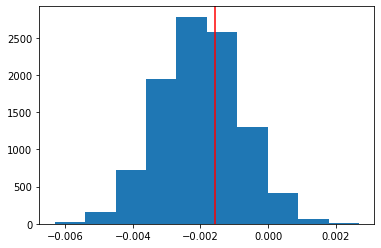

In [400]:
#p_diffs = np.array(p_diffs)
plt.hist(p_diffs);
plt.axvline(x= obs_diff,color='r');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

**The Right side proportion of the histogram is greater than the observed p_diffs**

In [412]:
# Calculatin the p_value
pval = (p_diffs > obs_diff).mean()
pval

0.3618

*k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?*

**The value we are getting here is called p_value means the probability of getting our statistic or more extreme value if the null is true, if lower than 0.05 means that I can reject my null hypothsis but in our case is too high value and there is no difference betwen old and new page, so we fail to reject our null hypothesis**

**After getting the p-value from the simulated difference between conversion rates of new page and new page we found out the p-value is (0.354) whis too high and more than (0.05), That is a reason we failed to reject the null hypothesis, and the new page is no better than the old page**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

**Number of conversions for each page**

In [247]:
import statsmodels.api as sm
# Number of conversions for old page
convert_old = df2.query('group=="control"')['converted'].sum()
# Number of conversion for new page
convert_new = df2.query('group=="treatment"')['converted'].sum()
# Number of row associated with the old page
n_old = df2.query('group == "control"')['user_id'].count()
# Number of row associated with the new page
n_new = df2.query('group == "treatment"')['user_id'].count()


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

**Number of individuals who received each page**

In [248]:
from statsmodels.stats.proportion import proportions_ztest

In [249]:
# Calculating z-score and p_value by statsmodel library
count = [convert_old,convert_new]
nobs = [n_old,n_new]
zstat, pval = proportions_ztest(count,nobs,alternative = 'smaller')
print ( zstat,pval)

1.3109241984234394 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The result is (1.31) standard deviations and (0.9) p_value, Since our z_score is between (1.96 and -1.96) and our p_value is higher than 0.05, so we cannot reject our null hypothesis**

**And the p-value created from the two tests are indication that we fail to reject the null hypothesis**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**In this case we should use logistic regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [287]:
df2['intercept'] = 1
# creating a dummy variables from landing page to represent new and old pages by ones and zeros
df2[['ab_page2','ab_page']] = pd.get_dummies(df2['landing_page'])
df2 = df2.drop('ab_page2',axis=1)

df2

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,661590,2017-01-11 16:55:06.154213,treatment,1,0,1,1
1,853541,2017-01-08 18:28:03.143765,treatment,1,0,1,1
2,679687,2017-01-19 03:26:46.940749,treatment,1,1,1,1
3,817355,2017-01-04 17:58:08.979471,treatment,1,1,1,1
4,839785,2017-01-15 18:11:06.610965,treatment,1,1,1,1
...,...,...,...,...,...,...,...
290580,718310,2017-01-21 22:44:20.378320,control,0,0,1,0
290581,751197,2017-01-03 22:28:38.630509,control,0,0,1,0
290582,945152,2017-01-12 00:51:57.078372,control,0,0,1,0
290583,734608,2017-01-22 11:45:03.439544,control,0,0,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [288]:
# Creating a logistic regression model
import statsmodels.api as sm
x = df2[['intercept','ab_page']]
y = df2['converted']

In [289]:
logmod = sm.Logit(y,x)
result = logmod.fit()
result.summary2()



Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2021-06-24 11:41 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The P-value associated with ab_page variable is (0.189) and it's different because in part 2 the test is one tailed and focuses only in one direction of the histogram, The null hypothesis in part 2 is that $p_{old}$ - $p_{new}$ >= 0 and the alternative hypothesis is $p_{old}$ - $p_{new}$ < 0, that the new page is better than the old page and has higher conversion rate**

**In part 3 Our null hypothesis is that there is no relation between ab_page and conversion rate, our alternative is that we have a relationship bewtween ab-page predictor and conversion rate which we failed to approve**

**The difference in p-value between the two approaches**

**1. In part 2, the test is one_tailed test to figure out the difference between conversion rates between the two pages using bootstraping from the sample and getting the p_value only by comparing with one direction of the distribution.**

**2. In part 3, the test is two_tailed test getting the p_value of all the variables taht affect the dcependtant variable to figure out if it has any significant effect on the response.**

**3. The p-value for both approaches is a great evidence that we fail to reject the null hypothesis which means that p-new is not any better than p-old**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**On the contrary if we have other influencer variables to add we better add them to our model to better fit and higher probability to find predictors with lower p-values**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [291]:
# Defining new variables from new dataset
countries_df = pd.read_csv('E://z/countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'),how='inner')
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,1,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,1,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,1,0,1,1


In [292]:
#creating dummy variables from country column 
dummy = pd.get_dummies(df_new['country'])
df_final = df_new.join(dummy)

df_final.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US
user_id,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,0,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,1,0,1,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,1,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,0,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,1,0,1,1,0,1,0


In [293]:
# generating another logistic regression model including the new variables
x = df_final[['intercept','CA','UK','ab_page']]
y = df_final['converted']

In [294]:
logmod = sm.Logit(y,x)
result = logmod.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2021-06-24 11:42 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
==================================================================

"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [295]:
# creating another two interaction variables
df_final['UK_ab_page'] = df_final['UK'] * df_final['ab_page']
df_final['US_ab_page'] =df_final['US'] * df_final['ab_page']

In [296]:
df_final.head()


,country,timestamp,group,landing_page,converted,intercept,ab_page,CA,UK,US,UK_ab_page,US_ab_page
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,0,0,1,0,0,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,1,0,1,1,0,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,1,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,0,0,1,0,0,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,1,0,1,1,0,1,0,1,0


In [297]:
# Creating a logistic regression model with the new interaction variables
x= df_final[['intercept','CA','UK','ab_page','UK_ab_page','US_ab_page']]
y = df_final['converted']

In [298]:
logmod = sm.Logit(y,x)
result = logmod.fit()
result.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.6602
Date:               2021-06-24 11:42 BIC:              212846.1381
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.19199    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9865    0.0096  -206.3440  0.0000  -2.0053  -1.9676
CA           -0.0175    0.0377    -0.4652  0.6418  -0.0914   0.0563
UK           -0.0057    0.0188    -0.3057  0.7598  -0.0426   0.0311
ab_page      -0.0674    0.0520    -1.2967  0.1947  -0.1694   0.0345
UK_ab_page    0.0783    0.0568     1.3783  0.1681  -0.0330   0.1896
US_ab_page    0.0469    0.0538     0.8718  0.3833  -0.0585   0.1523
==================================================================

"""

**Obviously from the p-values associated with the country predictor is not statistically significant**
**And there is no direct relationship between the independant variables(country,ab_page) and the response(conversion rate)**

**After creating interaction variables between two the existed variables we found out that the p_value associated with these interaction variables are not statistically significant and we failed to reject the null hypothesis**

<a id='conclusions'></a>
## Conclusions

**After testing by bootstraping from the null in the first place we found out that difference between conversion rates for people who received the old page and people who received the new page is almost the same so we failed to reject the null hypothis because we found out the p-value is too high which means that we still in the null zone**

**Then we used the regression approach we fit a model to found out that p-value measured means that there is no relationship between the two variables (the predictor and the response)**

**After including other variables (country) we found out the same result that there is positive relationship bwtween the predictors and the response thats why we failed tp reject the null hypothesis**

**Eventually we have created two interaction variables from the existed variables to do one more test, the resulted p_values are indicating that these variables are not statistically significant**

**After several tests with different techniques has been made to the raw data we suggest to stick with the old page to be the company main page and there is no siginificant reason to change to the new page because we found no significat change in the conversion rate between the two pages**


 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.

# Resources

1. **Stackoverflow.com**
2. **quora.com**
3. **statsmodel.org**
4. **pro.arcgis.com**
5. **investopedia.com**
6. **educba.com**
7. **reddit.com**
8. **displayr.com**